# Chemoinformatics using Python: Predict Solubility with ML and DL models

##### This notebook was inspired by the dataprofessor notebook. Link to the youtube video: https://www.youtube.com/watch?v=VXFFHHoE1wk
##### and use the datasets as reported by Meng et al. doi: https://doi.org/10.1038/s41597-022-01154-3

### Exploratory analysis on the aqsol dataset

#### Import the database

In [1]:
import pandas as pd
path=r"C:\Users\sylv_\Documents\GitHub\SolCuration\clean\aqsol_stand.csv"
df= pd.read_csv(path)

In [2]:
from rdkit import Chem

In [3]:
df

,smiles,logS,weight
0,B12B3B4B1C234,-4.74240,1
1,Br/C=C/Br,-1.74150,1
2,Br/C=C\Br,-1.31950,1
3,BrC(Br)(Br)Br,-3.14040,1
4,BrC(Br)Br,-1.91130,1
...,...,...,...
8696,c1coc(-c2nc3ccccc3[nH]2)c1,-3.41400,1
8697,c1coc(CNc2ncnc3[nH]cnc23)c1,-3.95000,1
8698,c1nc[nH]n1,1.00583,1
8699,c1ncc2[nH]cnc2n1,0.61940,1


In [4]:
df.smiles[4953]

'COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1'

#### Convert Smiles string into a RDKit object and working with it

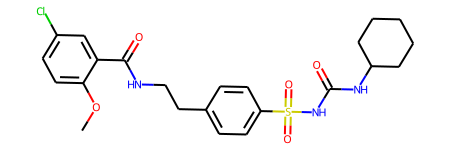

In [5]:
n=Chem.MolFromSmiles(df.smiles[4953])
n

In [6]:
n.GetNumAtoms()

33

#### Calculate molecular descriptor with RDKit

In [7]:
mol_list= [Chem.MolFromSmiles(element) for element in df.smiles]

In [8]:
mol_list[:5]

#### Physico-chemical properties that will be use for Solubility predictions

In [9]:
import numpy as np
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt,CalcNumRotatableBonds,CalcTPSA,CalcNumHBD,CalcNumHBA,CalcFractionCSP3,CalcPBF
from rdkit.Chem.Descriptors import MolLogP
def generate(mol_liste,verbose = False):
    
    base_data= np.arange(1,1)
    i=0
    for mol in mol_liste:
        descr_Mw= CalcExactMolWt(mol)
        descr_RB=CalcNumRotatableBonds(mol)
        descr_Polar=CalcTPSA(mol)
        descr_Hdonor= CalcNumHBD(mol)
        descr_Hacceptor=CalcNumHBA(mol)
        descr_Fsp3= CalcFractionCSP3(mol)
        descr_logP= MolLogP(mol)
        
        row= np.array([descr_Mw,descr_RB,
                       descr_Polar,descr_Hdonor,
                       descr_Hacceptor,descr_Fsp3,
                       descr_logP,
                      ])
        if (i==0):
            base_data= row
        else:
            base_data = np.vstack([base_data,row])
        i=i+1
        
    colnames= ["MolWt", "RotBond", "Polarity", "Hdonor", "Haccept", "SP3Atom", "logP"]
    descriptor= pd.DataFrame(data= base_data, columns= colnames)
    
    return descriptor
        

In [10]:
df_descrip= generate(mol_list)

In [11]:
df_descrip.sample(n=10)

,MolWt,RotBond,Polarity,Hdonor,Haccept,SP3Atom,logP
3733,228.172545,2.0,35.53,0.0,3.0,0.923077,3.76440
6953,108.068748,0.0,52.04,2.0,2.0,0.000000,0.85100
5009,349.131408,5.0,68.53,1.0,4.0,0.142857,3.93902
6609,295.116821,7.0,141.75,5.0,5.0,0.307692,-1.42100
1119,134.109550,0.0,0.00,0.0,0.0,0.400000,2.98410
724,223.084458,4.0,86.63,3.0,3.0,0.272727,0.52400
1565,408.287574,4.0,97.99,4.0,4.0,0.958333,3.44870
1377,232.203845,10.0,38.69,1.0,3.0,1.000000,2.47270
7249,209.032422,4.0,97.51,1.0,4.0,0.111111,1.25220
3585,240.089022,4.0,86.52,2.0,6.0,0.555556,1.67088


#### Aromatic proportion

##### 1.Number of aromatic atoms

In [12]:
def Arom_atoms(mol):
    arom_atoms= [mol.GetAtomWithIdx(i).GetIsAromatic() for i  in range(mol.GetNumAtoms())]
    aa_count=[]
    for i in arom_atoms:
        if i == True:
            aa_count.append(1)
    sum_aa_count= sum(aa_count)
    return sum_aa_count

In [13]:
desc_AA= [Arom_atoms(element) for element in mol_list]
desc_AA

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 12,
 12,
 12,
 6,
 12,
 12,
 6,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 6,
 6,
 12,
 10,
 6,
 6,
 19,
 19,
 10,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 6,
 6,
 0,
 0,
 0,
 12,
 12,
 6,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 0,
 0,
 12,
 12,
 6,
 11,
 11,
 0,
 0,
 0,
 6,
 0,
 6,
 12,
 36,
 18,
 12,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 10,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


##### 2.Number of Heavy Atoms

In [14]:
from rdkit.Chem.Lipinski import HeavyAtomCount

In [15]:
desc_HeavA= [HeavyAtomCount(element) for element in mol_list]
desc_HeavA

[5,
 4,
 4,
 5,
 4,
 6,
 18,
 18,
 7,
 4,
 3,
 5,
 9,
 4,
 5,
 6,
 9,
 12,
 24,
 23,
 15,
 10,
 22,
 19,
 9,
 17,
 20,
 18,
 14,
 13,
 17,
 16,
 9,
 8,
 8,
 15,
 11,
 8,
 9,
 21,
 21,
 11,
 7,
 8,
 7,
 3,
 4,
 6,
 6,
 16,
 6,
 10,
 7,
 9,
 12,
 11,
 16,
 15,
 16,
 15,
 7,
 20,
 23,
 23,
 22,
 23,
 25,
 22,
 23,
 9,
 28,
 30,
 36,
 37,
 30,
 25,
 12,
 12,
 24,
 4,
 4,
 4,
 20,
 22,
 5,
 6,
 7,
 7,
 8,
 9,
 9,
 14,
 8,
 26,
 23,
 4,
 20,
 24,
 24,
 24,
 22,
 22,
 22,
 23,
 23,
 22,
 25,
 8,
 26,
 42,
 28,
 14,
 14,
 9,
 9,
 19,
 21,
 7,
 19,
 24,
 7,
 11,
 5,
 7,
 7,
 8,
 42,
 13,
 20,
 79,
 17,
 51,
 6,
 7,
 4,
 5,
 14,
 14,
 14,
 6,
 26,
 6,
 20,
 7,
 8,
 5,
 5,
 85,
 17,
 6,
 12,
 7,
 5,
 14,
 12,
 13,
 11,
 16,
 9,
 4,
 6,
 24,
 5,
 5,
 5,
 21,
 4,
 18,
 10,
 7,
 7,
 23,
 5,
 6,
 5,
 6,
 7,
 12,
 6,
 12,
 8,
 8,
 12,
 15,
 18,
 12,
 14,
 16,
 10,
 5,
 6,
 7,
 8,
 12,
 7,
 17,
 17,
 5,
 6,
 5,
 6,
 7,
 5,
 10,
 14,
 3,
 8,
 6,
 12,
 3,
 4,
 9,
 6,
 6,
 5,
 6,
 10,
 10,
 6,
 6,
 6,
 6,

In [16]:
desc_Aromproportion= [Arom_atoms(element)/HeavyAtomCount(element) for element in mol_list]
desc_Aromproportion

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6666666666666666,
 0.5,
 0.5,
 0.5217391304347826,
 0.8,
 0.6,
 0.5454545454545454,
 0.631578947368421,
 0.6666666666666666,
 0.7647058823529411,
 0.6,
 0.6666666666666666,
 0.8571428571428571,
 0.9230769230769231,
 0.7058823529411765,
 0.75,
 0.6666666666666666,
 0.75,
 0.75,
 0.8,
 0.9090909090909091,
 0.75,
 0.6666666666666666,
 0.9047619047619048,
 0.9047619047619048,
 0.9090909090909091,
 0.8571428571428571,
 0.75,
 0.8571428571428571,
 0.0,
 0.0,
 0.0,
 0.0,
 0.375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.375,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.2727272727272727,
 0.2608695652173913,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.32432432432432434,
 0.2,
 0.0,
 0.0,
 0.0,
 0.4166666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.42857142857142855,
 0.0,
 0.23076923076923078,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.25,
 0.5,
 0.5,
 

In [17]:
df_descr_Aromprop= pd.DataFrame(desc_Aromproportion, columns= ['Aromproportion'])

## Data Matrice of descriptors

In [18]:
x= pd.concat([df_descrip,df_descr_Aromprop], axis=1)
x.describe()

,MolWt,RotBond,Polarity,Hdonor,Haccept,SP3Atom,logP,Aromproportion
count,8701.000000,8701.000000,8701.000000,8701.000000,8701.000000,8701.000000,8701.000000,8701.000000
mean,246.818141,3.773130,54.578894,1.071371,3.126652,0.439087,2.416538,0.335043
std,126.813210,4.635448,42.294424,1.346715,2.404365,0.345819,2.435002,0.298453
min,40.031300,0.000000,0.000000,0.000000,0.000000,0.000000,-17.406400,0.000000
25%,161.896054,1.000000,26.020000,0.000000,2.000000,0.125000,0.978600,0.000000
50%,224.090940,3.000000,47.360000,1.000000,3.000000,0.400000,2.143600,0.375000
75%,305.917276,5.000000,75.270000,2.000000,4.000000,0.750000,3.527520,0.571429
max,2284.054626,68.000000,633.200000,24.000000,40.000000,1.000000,26.246600,1.000000


## Target Matrice

In [19]:
y= df.iloc[:, 1]

y.describe()

count    8701.000000
mean       -3.001496
std         2.302020
min       -13.171900
25%        -4.349900
50%        -2.701590
75%        -1.418640
max         2.137680
Name: logS, dtype: float64

### Combine x and y

In [20]:
dataset_sol1= pd.concat([x,y], axis=1)
dataset_sol1

,MolWt,RotBond,Polarity,Hdonor,Haccept,SP3Atom,logP,Aromproportion,logS
0,56.037222,0.0,0.00,0.0,0.0,1.0,-1.3084,0.000,-4.74240
1,183.852324,0.0,0.00,0.0,0.0,0.0,2.2474,0.000,-1.74150
2,183.852324,0.0,0.00,0.0,0.0,0.0,2.2474,0.000,-1.31950
3,327.673348,0.0,0.00,0.0,0.0,1.0,3.1773,0.000,-3.14040
4,249.762836,0.0,0.00,0.0,0.0,1.0,2.4547,0.000,-1.91130
...,...,...,...,...,...,...,...,...,...
8696,184.063663,1.0,41.82,1.0,2.0,0.0,2.8229,1.000,-3.41400
8697,215.080710,3.0,79.63,2.0,5.0,0.1,1.5580,0.875,-3.95000
8698,69.032697,0.0,41.57,1.0,2.0,0.0,-0.1953,1.000,1.00583
8699,120.043596,0.0,54.46,1.0,3.0,0.0,0.3529,1.000,0.61940


In [21]:
min_vals = dataset_sol1.min()
max_vals = dataset_sol1.max()
ranges = max_vals - min_vals

# subtract the minimum from each value
dataset_sol1 = dataset_sol1 - min_vals

# divide by the range
dataset_sol1 = dataset_sol1 / ranges

In [22]:
dataset_sol1

,MolWt,RotBond,Polarity,Hdonor,Haccept,SP3Atom,logP,Aromproportion,logS
0,0.007133,0.000000,0.000000,0.000000,0.000,1.0,0.368772,0.000,0.550603
1,0.064091,0.000000,0.000000,0.000000,0.000,0.0,0.450228,0.000,0.746617
2,0.064091,0.000000,0.000000,0.000000,0.000,0.0,0.450228,0.000,0.774182
3,0.128181,0.000000,0.000000,0.000000,0.000,1.0,0.471530,0.000,0.655243
4,0.093462,0.000000,0.000000,0.000000,0.000,1.0,0.454977,0.000,0.735526
...,...,...,...,...,...,...,...,...,...
8696,0.064185,0.014706,0.066045,0.041667,0.050,0.0,0.463411,1.000,0.637372
8697,0.078007,0.044118,0.125758,0.083333,0.125,0.1,0.434435,0.875,0.602361
8698,0.012924,0.000000,0.065651,0.041667,0.050,0.0,0.394271,1.000,0.926069
8699,0.035656,0.000000,0.086008,0.041667,0.075,0.0,0.406829,1.000,0.900828


## ML with Pycaret

### Model Setup

In [23]:
from pycaret.regression import *

In [24]:
model1= setup(data= dataset_sol1, target= 'logS', train_size=0.8, verbose = True, remove_outliers = True, outliers_threshold =0.005)

,Description,Value
0,Session id,4535
1,Target,logS
2,Target type,Regression
3,Original data shape,"(8701, 9)"
4,Transformed data shape,"(8667, 9)"
5,Transformed train set shape,"(6926, 9)"
6,Transformed test set shape,"(1741, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Model Comparaison

In [25]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0435,0.0039,0.0626,0.8253,0.0390,0.0754,0.4540
rf,Random Forest Regressor,0.0445,0.0040,0.0633,0.8210,0.0395,0.0771,0.5650
lightgbm,Light Gradient Boosting Machine,0.0455,0.0040,0.0634,0.8205,0.0395,0.0790,0.3630
gbr,Gradient Boosting Regressor,0.0493,0.0046,0.0674,0.7973,0.0420,0.0862,0.4290
knn,K Neighbors Regressor,0.0523,0.0052,0.0721,0.7683,0.0449,0.0907,0.3480
ada,AdaBoost Regressor,0.0628,0.0065,0.0809,0.7093,0.0499,0.1091,0.3800
lr,Linear Regression,0.0633,0.0075,0.0864,0.6669,0.0532,0.1124,0.6680
lar,Least Angle Regression,0.0633,0.0075,0.0864,0.6669,0.0532,0.1124,0.3620
br,Bayesian Ridge,0.0633,0.0075,0.0864,0.6669,0.0532,0.1124,0.3520
ridge,Ridge Regression,0.0642,0.0075,0.0867,0.6651,0.0535,0.1149,0.3440


ExtraTreesRegressor(n_jobs=-1, random_state=4535)

In [26]:
et= create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0403,0.0034,0.0583,0.8545,0.0361,0.0661
1,0.0432,0.0039,0.0625,0.8035,0.0384,0.0714
2,0.0414,0.0034,0.0580,0.8569,0.0364,0.0902
3,0.0442,0.0042,0.0645,0.8228,0.0398,0.0740
4,0.0436,0.0037,0.0611,0.8384,0.0383,0.0757
5,0.0464,0.0044,0.0662,0.8098,0.0415,0.0795
6,0.0451,0.0045,0.0670,0.8039,0.0421,0.0778
7,0.0415,0.0038,0.0613,0.8214,0.0378,0.0682
8,0.0437,0.0038,0.0619,0.8248,0.0388,0.0761


In [27]:
#tuned_et= tune_model(et,n_iter= 50, optimize = 'MAE')

In [28]:
#print(tuned_et)

NameError: name 'tuned_et' is not defined

### Model analysis

#### 1. Plot Model

##### Residual Plot

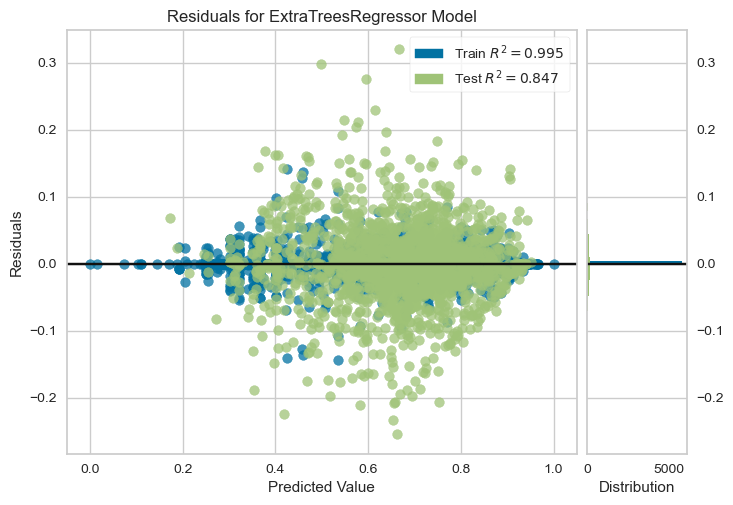

In [29]:
plot_model(et, 'residuals')

##### Prediction error Plot

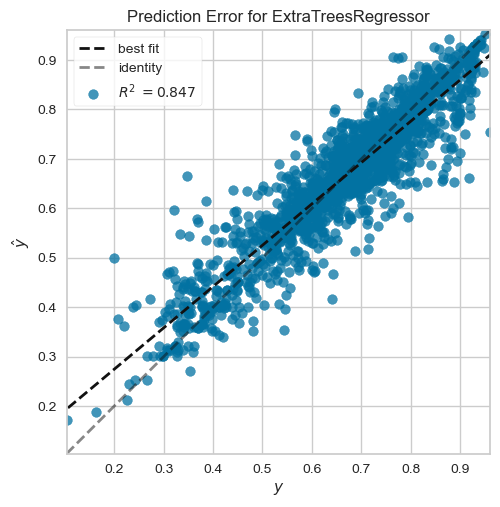

In [30]:
plot_model(et, 'error')

##### Cooks Distance Plot

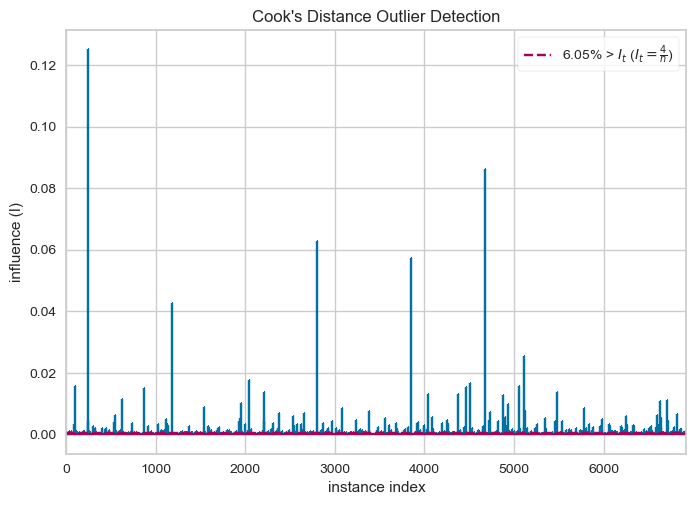

In [31]:
plot_model(et, 'cooks')

##### Recursive Feature Selection

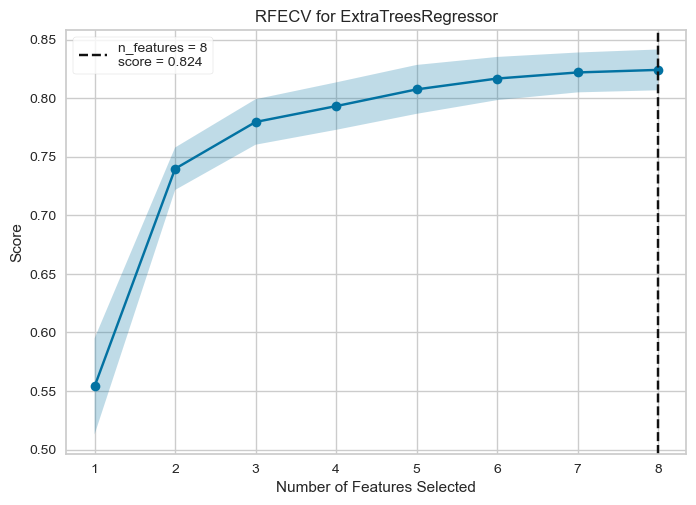

In [32]:
plot_model(et, 'rfe')

##### Learning Curve

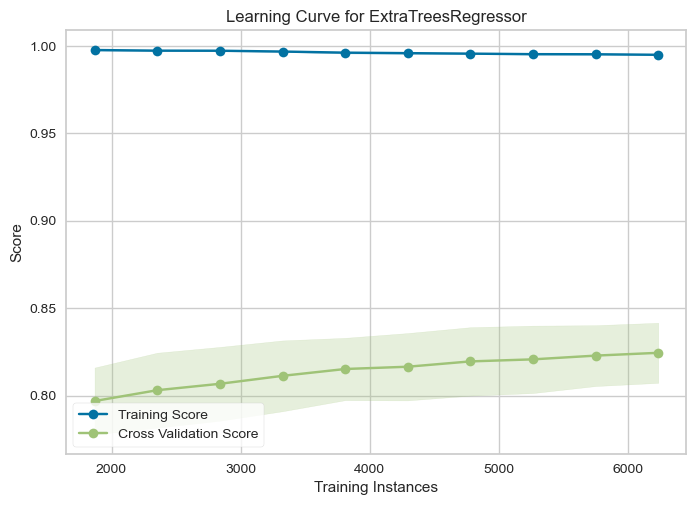

In [33]:
plot_model(et, 'learning')

##### Validation Curve

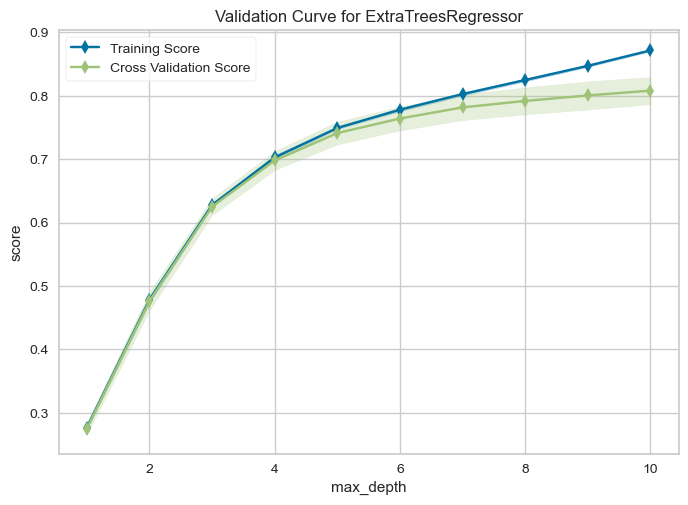

In [34]:
plot_model(et,'vc')

##### Manifold Learning

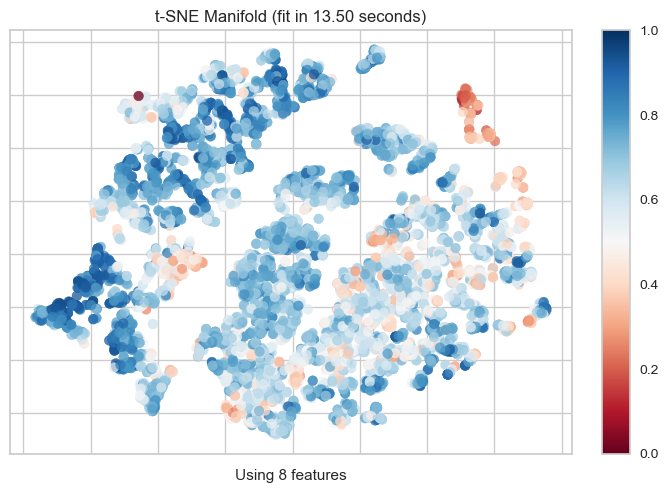

In [35]:
plot_model(et, 'manifold')

##### Feature importance

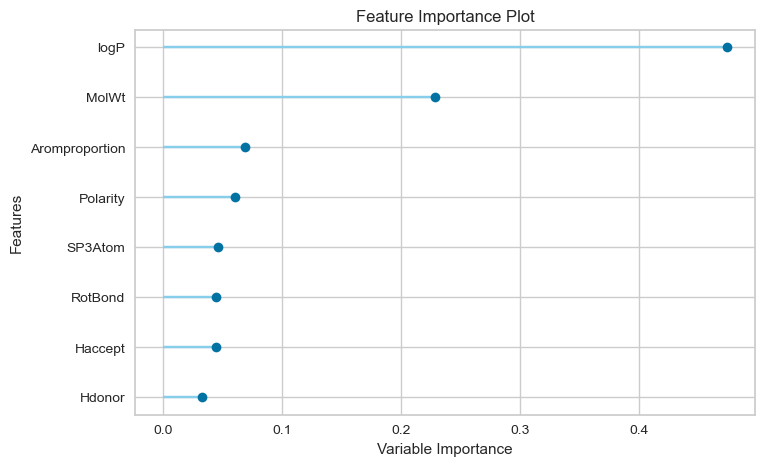

In [36]:
plot_model(et, 'feature')

##### Hyperparameters

In [37]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


#### Show all plots

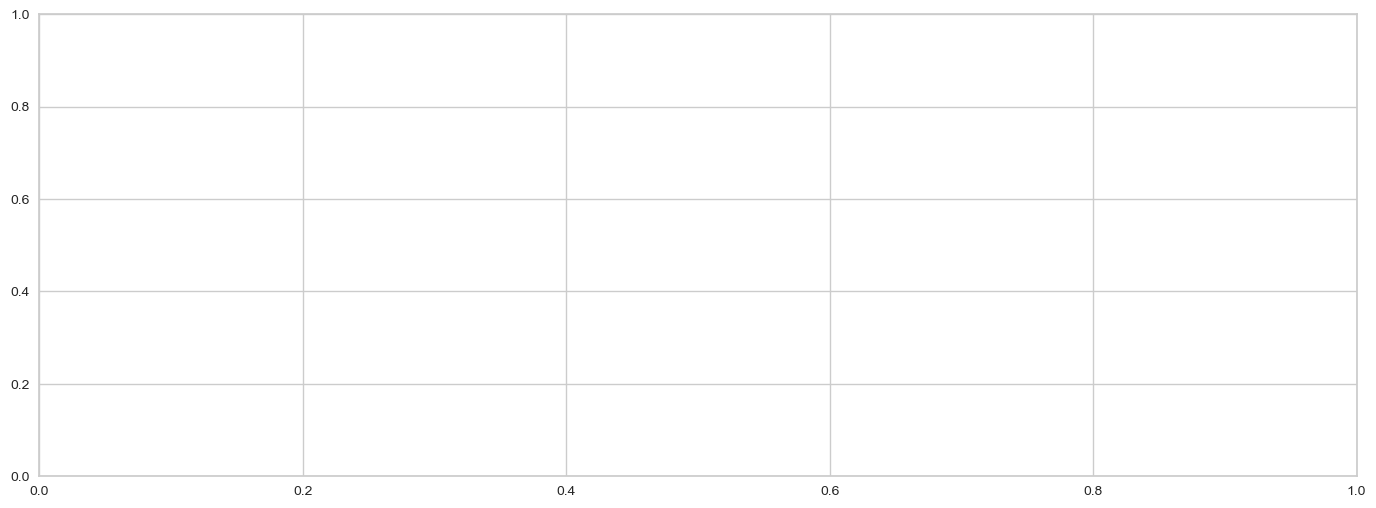

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
evaluate_model(et)

### 2.Model Interpretation

##### Summary plot

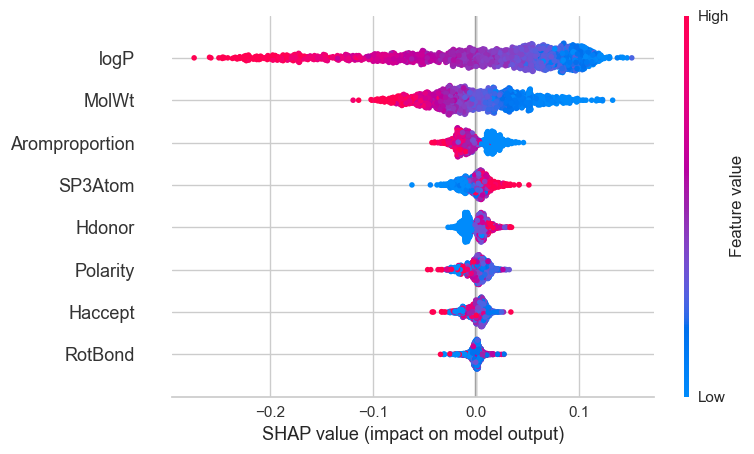

In [39]:
interpret_model(et)

##### Reason Plot

In [40]:
interpret_model(et, plot= 'reason', observation= 20)

#### External Test

In [41]:
prediction_test= predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0419,0.0035,0.0591,0.8471,0.0367,0.0709


In [42]:
prediction_test.head()

,MolWt,RotBond,Polarity,Hdonor,Haccept,SP3Atom,logP,Aromproportion,logS,prediction_label
5125,0.182777,0.029412,0.127401,0.041667,0.150,0.708333,0.485673,0.000000,0.454088,0.551488
5109,0.153671,0.073529,0.059033,0.000000,0.075,0.333333,0.498007,0.315789,0.524077,0.529056
1933,0.025427,0.000000,0.005117,0.000000,0.025,0.666667,0.426823,0.000000,0.868633,0.854486
2816,0.103022,0.176471,0.090982,0.041667,0.050,0.866667,0.477784,0.000000,0.681747,0.639738
3170,0.058842,0.073529,0.100442,0.041667,0.075,0.500000,0.420977,0.000000,0.816751,0.799375
